In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### There are no null values in dataset

In [94]:
num_cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
binary_cols = ['Work_accident','promotion_last_5years']
cat_cols = ['Department','salary']

In [95]:
for col in num_cols:
    print(f"skewness in {col} : {df[col].skew().round(2)}")

skewness in satisfaction_level : -0.48
skewness in last_evaluation : -0.03
skewness in number_project : 0.34
skewness in average_montly_hours : 0.05
skewness in time_spend_company : 1.85


#### time_spend_company is highly right-skewed. we will use robust scaler for this column and standardscaler for other columns

In [96]:
robust_features = ['time_spend_company']
standard_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours']
binary_features = ['Work_accident','promotion_last_5years']

## Bivariate Analysis

C:\Users\bansa\AppData\Local\Temp\ipykernel_7228\3358938246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')


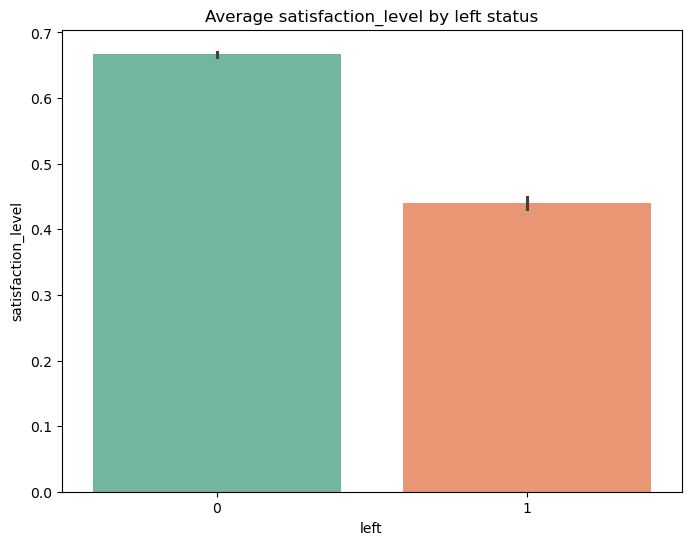

C:\Users\bansa\AppData\Local\Temp\ipykernel_7228\3358938246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')


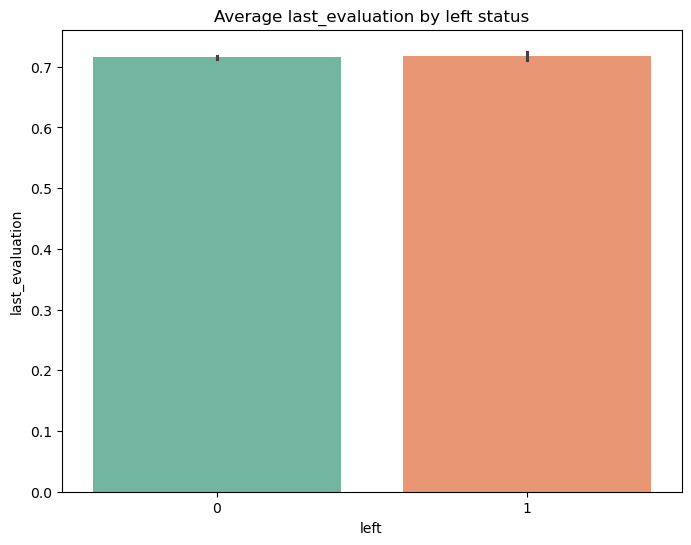

C:\Users\bansa\AppData\Local\Temp\ipykernel_7228\3358938246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')


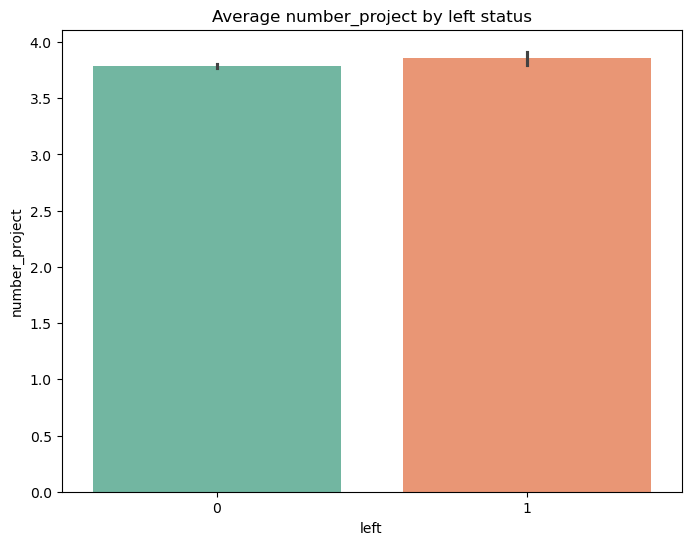

C:\Users\bansa\AppData\Local\Temp\ipykernel_7228\3358938246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')


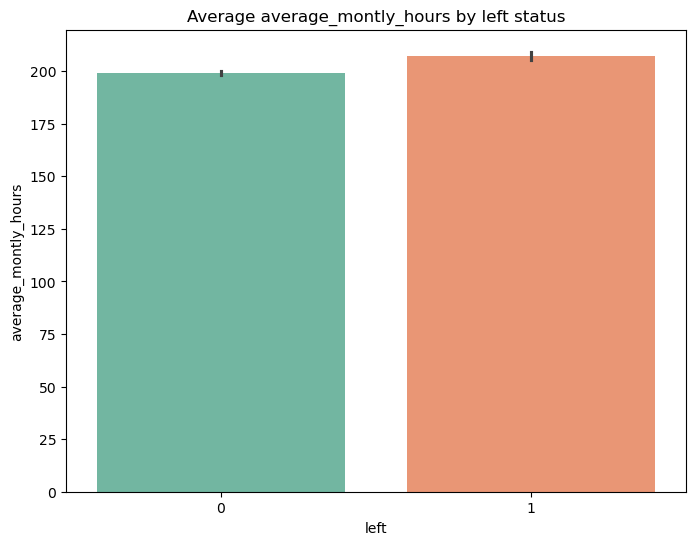

C:\Users\bansa\AppData\Local\Temp\ipykernel_7228\3358938246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')


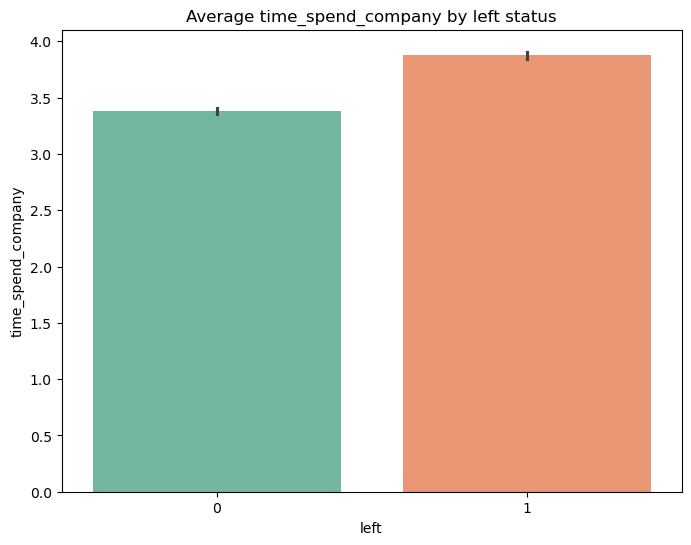

In [97]:
for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.barplot(x='left', y=col, data=df, estimator='mean', palette='Set2')
    plt.title(f'Average {col} by left status')
    plt.show()

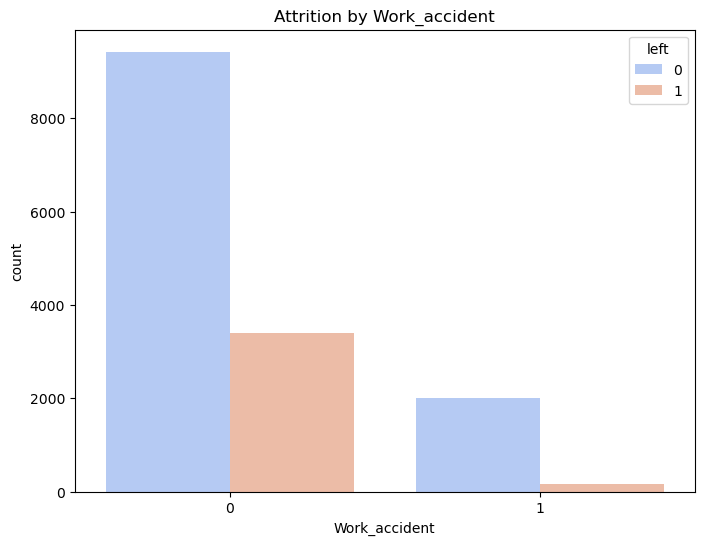

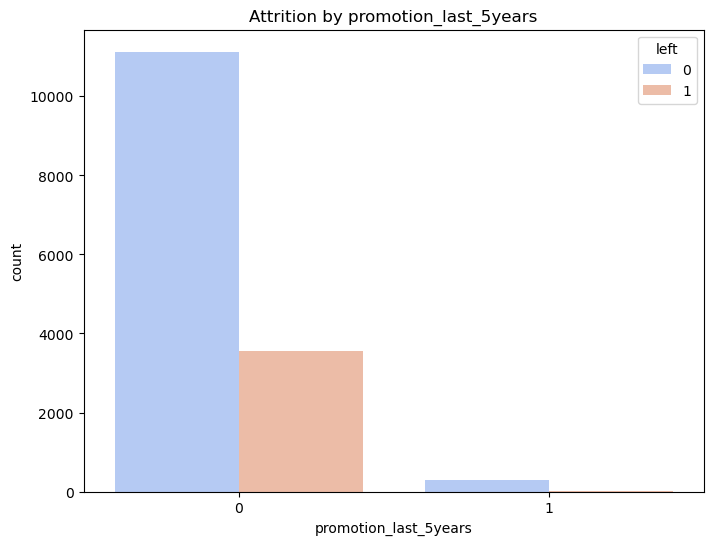

In [98]:
for col in binary_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, hue='left', data=df, palette='coolwarm')
    plt.title(f'Attrition by {col}')
    plt.show()

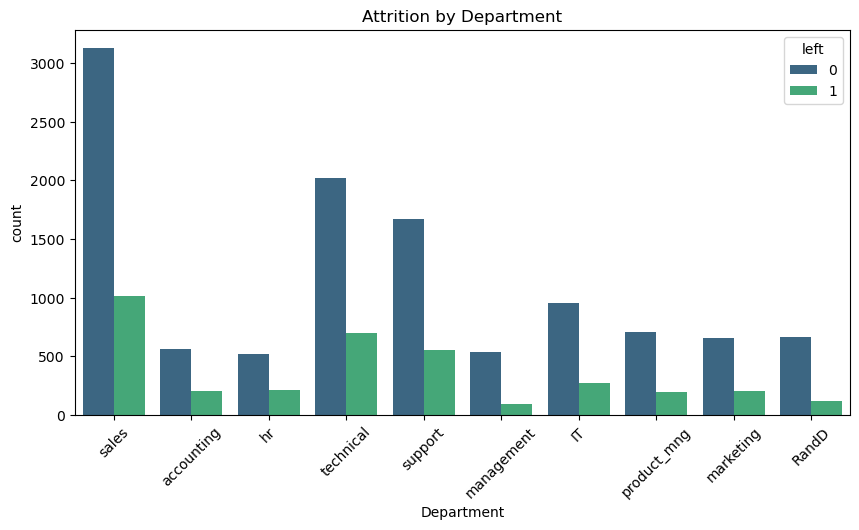

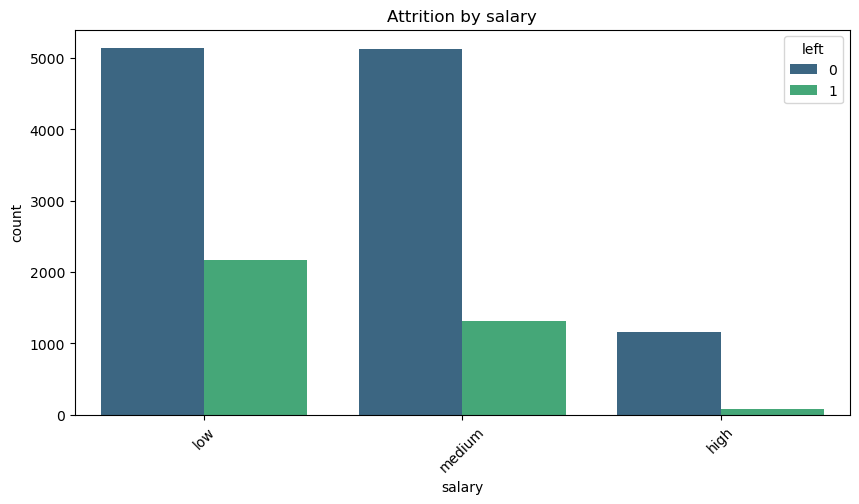

In [99]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='left', data=df, palette='viridis')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [100]:
df_ohe = df.copy()

In [101]:
df_dummies = pd.get_dummies(df_ohe ,columns=['salary','Department'],drop_first=True)

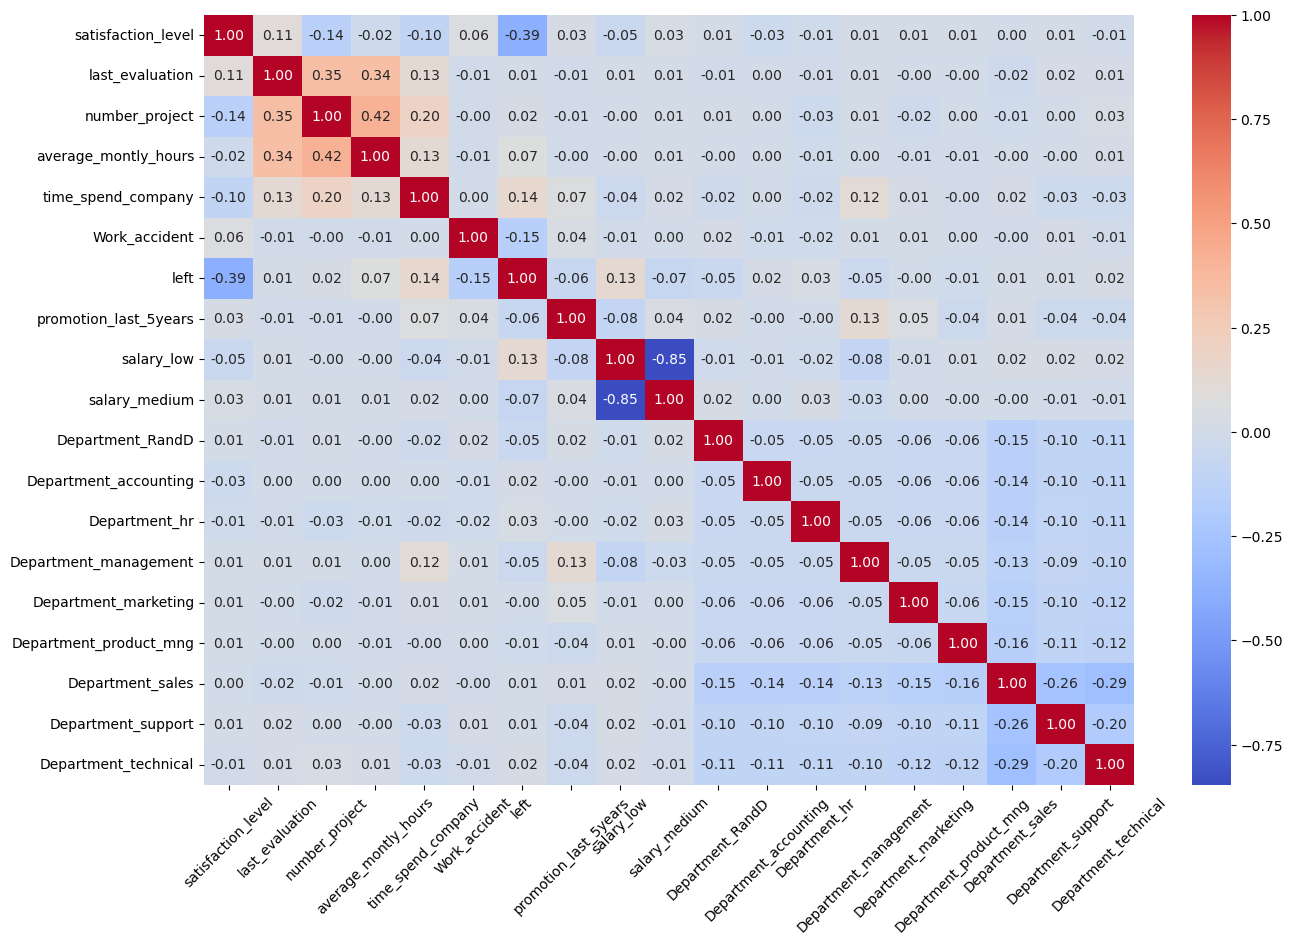

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

### According to above EDA , we can see that left is positively correlated with time_spent_company, average_montly_hours,salary_low and negatively correlated with satisfaciton_level, work_accident

In [103]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, classification_report

### Building with Logistic regression

In [104]:
## Splitting the dataset
X = df.drop('left',axis=1)
y = df['left']

num_features = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']
cat_features = ['salary','Department']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y )
print('Target distribution:\n', y.value_counts(normalize=True).round(2))

Target distribution:
 left
0    0.76
1    0.24
Name: proportion, dtype: float64


In [105]:
## Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('standard',StandardScaler(),standard_features),
    ('robust',RobustScaler(),robust_features),
    ('categorical',OneHotEncoder(drop='first'),['salary','Department']),
    ('binary','passthrough',binary_features)
])

In [106]:
## Building Logistic Regression Pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [107]:
## Hyperparameter grid
param_grid_logistic = {
    'classifier__C': [0.01,0.1,1,10],
    'classifier__penalty': ['l2']
}

In [108]:
## scoring Metrics
scoring_logistics = {
    'f1':make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba')
}

In [109]:
## cross-validation
cv_logistics = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [110]:
## Grid search
grid_search_logistics = GridSearchCV(logistic_pipeline, param_grid_logistic, cv=cv_logistics, scoring=scoring_logistics, refit='roc_auc', verbose=1)

In [111]:
## Model Training
grid_search_logistics.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['satisfaction_level',
                                                                          'last_evaluation',
                                                                          'number_project',
                                                                          'average_montly_hours']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['time_spend_company']),
                                                                        ('categorical',
                                                                         OneHotEncoder(drop='first')...
                                                                         ['Work_accident',
                                                                          'promotion_last_5years'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l2']},
             refit='roc_auc',
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba')},
             verbose=1)

In [112]:
y_pred = grid_search_logistics.predict(X_test)
y_proba = grid_search_logistics.predict_proba(X_test)[:,1]

In [113]:
print("Best Parameters:", grid_search_logistics.best_params_)
print("\nTest ROC-AUC:", roc_auc_score(y_test,y_proba))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}

Test ROC-AUC: 0.8273777869269611

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83      3429
           1       0.50      0.80      0.62      1071

    accuracy                           0.77      4500
   macro avg       0.71      0.78      0.72      4500
weighted avg       0.82      0.77      0.78      4500



### Buiding Model with RandomForestClassifier

#### There is no need for preprocessing in Tree based algorithms so we will not preprocess data but we will have to encode categorical columns and then split the dataset into train data, test data

In [114]:
X_encoded_random = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_encoded_random, y, test_size=0.3, random_state=42, stratify=y)

In [115]:
param_grid_random = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [116]:
scoring_random = {
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba')
}

In [117]:
cv_random = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [118]:
grid_search_random = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid = param_grid_random,
    cv = cv_random,
    scoring = scoring_random,
    refit = 'roc_auc',
    verbose = 1
)

In [119]:
grid_search_random.fit(X_train_random,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='roc_auc',
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba')},
             verbose=1)

In [120]:
y_pred_random = grid_search_random.predict(X_test_random)
y_proba_random = grid_search_random.predict_proba(X_test_random)[:,1]

In [122]:
print("Random Forest Results")
print("Best Parameters for RandomFroest:", grid_search_random.best_params_)
print("\nTest ROC-AUC for RandomForest:", roc_auc_score(y_test_random,y_proba_random))
print("\nClassification Report for RandomForest:\n", classification_report(y_test_random,y_pred_random))

Random Forest Results
Best Parameters for RandomFroest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Test ROC-AUC for RandomForest: 0.3515840476367469

Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68      3429
           1       0.12      0.16      0.14      1071

    accuracy                           0.54      4500
   macro avg       0.42      0.41      0.41      4500
weighted avg       0.57      0.54      0.55      4500



###  Final Conclusion – HR Attrition Modeling

- **Logistic Regression outperformed Random Forest**, achieving a ROC-AUC score of **0.83**, indicating strong predictive capability for employee attrition.
- The model demonstrated **80% recall** for employees who left, making it highly effective for identifying potential leavers.
- **Precision for class 1 (leavers) was 0.50**, which is acceptable in HR contexts where early intervention is more valuable than avoiding false positives.
- The Random Forest model, despite hyperparameter tuning and class balancing, delivered a ROC-AUC of only **0.35**, suggesting poor separation between classes.
- A robust preprocessing pipeline was implemented for Logistic Regression, including:
  - **StandardScaler** for symmetric numerical features
  - **RobustScaler** for skewed features like `time_spend_company`
  - **OneHotEncoding** for categorical variables
  - **Passthrough** for binary features
- **Class imbalance was addressed** using `class_weight='balanced'`, improving recall and fairness across classes.
- The final model is suitable for **deployment in HR analytics systems**, enabling proactive retention strategies and risk-based employee monitoring.
- Future enhancements could include:
  - **SMOTE or ADASYN** for synthetic balancing
  - **Feature selection** to reduce noise
  - **XGBoost or ensemble methods** for deeper pattern learning
